In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [386]:
import pickle

In [387]:
train_file_path = "train_dataset.pickle"

with open(train_file_path, "rb") as file:
    train = pickle.load(file)

print(train)

[[0.0378092  1.17107145]
 [0.07671389 1.08302106]
 [0.35792397 1.23353012]
 ...
 [0.06301774 1.06722545]
 [0.87451722 3.74621323]
 [0.4855251  1.83410603]]


In [388]:
test_file_path = "test_dataset.pickle"

with open(test_file_path, "rb") as file:
    test = pickle.load(file)

print(test)

[[0.93816262 4.17610043]
 [0.12683663 1.14477149]
 [0.69200514 2.59031782]
 [0.62910567 2.5595689 ]
 [0.96231186 4.57241736]
 [0.8475707  3.56683218]
 [0.49887715 1.87177622]
 [0.06536856 1.06990506]
 [0.8514891  3.5634183 ]
 [0.58189877 2.40535991]
 [0.67200711 2.49723187]
 [0.20092187 1.24842779]
 [0.3487721  1.50836404]
 [0.86448841 3.66504178]
 [0.25257637 1.23924468]
 [0.40314262 1.3762234 ]
 [0.47190848 1.79691264]
 [0.9921782  4.90723158]
 [0.3689889  1.55052333]
 [0.57232924 2.10288389]
 [0.96491309 4.60039596]
 [0.10886401 1.1218957 ]
 [0.81956034 3.33006223]
 [0.95959133 4.54338957]
 [0.2932823  1.40146455]
 [0.78264689 3.08668109]
 [0.04868554 1.05116615]
 [0.27287428 1.36513444]
 [0.72665708 2.76477604]
 [0.53827254 1.99039331]
 [0.19095483 1.23355969]
 [0.59062092 2.16753643]
 [0.27051011 1.36102291]
 [0.5838376  2.14319669]
 [0.03825312 1.03977042]
 [0.32186111 1.45497524]
 [0.3237083  1.45854433]
 [0.46882619 1.78865915]
 [0.56918508 2.09207956]
 [0.49630822 1.86443365]


In [389]:
performance_metrics = pd.DataFrame({'Performance score': train[:,0], 'Risk score': train[:,1]})
performance_metrics

,Performance score,Risk score
0,0.037809,1.171071
1,0.076714,1.083021
2,0.357924,1.233530
3,0.036506,1.037886
4,0.938956,4.330800
...,...,...
795,0.606003,2.224381
796,0.528971,1.961330
797,0.063018,1.067225
798,0.874517,3.746213


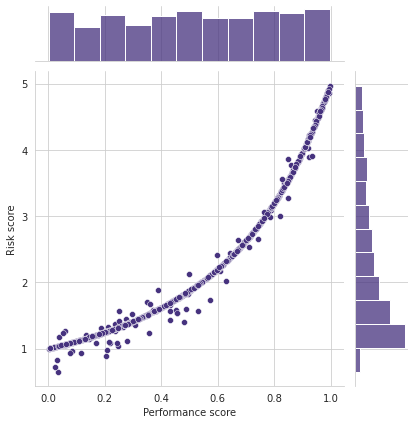

In [390]:
sns.set_style('whitegrid')
sns.set_palette("viridis")

sns.jointplot(data=performance_metrics, x='Performance score', y='Risk score')

plt.show()

In [391]:
X_test_ = test[:,0].reshape(-1, 1)
y_test = test[:,1]

In [392]:
# dividing the train set into 20 equal parts randomly
np.random.shuffle(train)
train_data = np.array_split(train, 20)

for i, part in enumerate(train_data):
    print(f"Part {i + 1}:\n{part}")

Part 1:
[[0.52306306 1.94321818]
 [0.38829105 1.59252497]
 [0.76801678 2.99737936]
 [0.16823106 1.20076249]
 [0.38763126 1.59105995]
 [0.61891146 2.27393312]
 [0.01288735 1.01305555]
 [0.67591518 2.51501084]
 [0.29030799 1.39607467]
 [0.82478382 3.36672369]
 [0.12702487 1.14501557]
 [0.03195132 0.8303921 ]
 [0.08776226 1.09609152]
 [0.30491518 1.42286477]
 [0.60896767 2.17704407]
 [0.35766247 1.5266795 ]
 [0.0139067  1.01410274]
 [0.8592805  3.62384942]
 [0.68726113 2.56775511]
 [0.07513844 1.08831349]
 [0.12102631 1.13728379]
 [0.10350951 1.11524172]
 [0.80450484 3.22754762]
 [0.60903083 2.23585125]
 [0.46194775 1.77045553]
 [0.96185016 4.56747433]
 [0.20668535 0.98464314]
 [0.05749942 1.06098604]
 [0.22536578 1.28618489]
 [0.78952893 3.13004841]
 [0.0467181  1.04899833]
 [0.31284026 1.4377413 ]
 [0.56067785 2.06328462]
 [0.42112221 1.66818805]
 [0.37559955 1.5647106 ]
 [0.72770985 2.77035454]
 [0.69067896 2.58397968]
 [0.24931784 1.32503751]
 [0.69876089 2.62298037]
 [0.62952125 2.31

In [393]:
avg_prediction = np.zeros(shape=(1))
bias = np.zeros(shape=(15))   
bias_2 = np.zeros(shape=(15))   
variance = np.zeros(shape=(15))
irr_err = np.zeros(shape=(15))
mse = np.zeros(shape=(15)) 
mse_train = np.zeros(shape=(15)) 

In [394]:

for d in range(1,16):

    polynomial = PolynomialFeatures(degree=d)

    X_test = polynomial.fit_transform(X_test_)
   
    predictions = np.zeros(shape=(200, 20))
    pred_train = np.zeros(shape=(40, 20))

    fx_Fx_2_train = np.zeros(shape=40)
    
    for i in range(0, 20):

        X_train_ = train_data[i][:, 0].reshape(-1, 1)
        X_train = polynomial.fit_transform(X_train_)
        y_train = train_data[i][:, 1]

        model = LinearRegression()
        
        model.fit(X_train, y_train)

        predictions[:,i] = model.predict(X_test)
        pred_train[:,i] = model.predict(X_train)

        fx_Fx_2_train += (y_train - pred_train[:,i])**2

    fx_Fx_2 = np.zeros(shape=200)
    fx_Fx_2 = np.sum((y_test.reshape(-1,1) - predictions)**2, axis=1)/20

    fx_Fx_2_train /= 20
    mse_train[d-1] = np.mean(fx_Fx_2_train)
    
    avg_prediction = np.mean(predictions, axis=1)

    bias[d-1] = np.mean(abs(avg_prediction - y_test))
    bias_2[d-1] = np.mean((avg_prediction - y_test)**2)

    x = np.empty_like(predictions)  # Create an empty array of the same shape as 'predictions'
    for i in range(20):
        x[:,i] = predictions[:,i] - avg_prediction

    variance[d-1] = np.mean(np.mean(x**2))

    mse[d-1] = np.mean(fx_Fx_2)

    irr_err[d-1] = np.mean(fx_Fx_2 - ((avg_prediction - y_test)**2 + np.mean(x**2)))

    print("Degree of polynomial: " + str(d) + "\nBias: " + str(bias[d-1]) + " Bias^2: " + str(bias_2[d-1]) + " Variance: " + str(variance[d-1]) + " Irr_error: " + str(irr_err[d-1]) +" MSE: " + str(mse[d-1]) + "\n")
       
    

Degree of polynomial: 1
Bias: 0.26925900949145903 Bias^2: 0.11444892644032655 Variance: 0.007734304734765053 Irr_error: 2.654126918244515e-18 MSE: 0.12218323117509161

Degree of polynomial: 2
Bias: 0.0864708945840653 Bias^2: 0.012114583049711549 Variance: 0.0010176894616520666 Irr_error: 9.367506770274759e-19 MSE: 0.013132272511363619

Degree of polynomial: 3
Bias: 0.033287952536702435 Bias^2: 0.004703765639995616 Variance: 0.000512081303137401 Irr_error: -2.9967348047499343e-18 MSE: 0.005215846943133013

Degree of polynomial: 4
Bias: 0.024665312849792728 Bias^2: 0.004257097489133653 Variance: 0.0005288905923202459 Irr_error: -2.3548871186385155e-18 MSE: 0.004785988081453897

Degree of polynomial: 5
Bias: 0.024517878990548927 Bias^2: 0.00423069538935908 Variance: 0.0005843350866374513 Irr_error: -3.877106968808164e-18 MSE: 0.0048150304759965274

Degree of polynomial: 6
Bias: 0.023673067394527996 Bias^2: 0.0042188779632308685 Variance: 0.0007202850826393268 Irr_error: 6.453171330633723e

In [395]:
Degree = np.arange(1, 16)

df = pd.DataFrame({'Model Complexity': Degree, 'Bias': bias, 'Variance': variance})
df

,Model Complexity,Bias,Variance
0,1,0.269259,0.007734
1,2,0.086471,0.001018
2,3,0.033288,0.000512
3,4,0.024665,0.000529
4,5,0.024518,0.000584
5,6,0.023673,0.000720
6,7,0.023983,0.000932
7,8,0.023805,0.001320
8,9,0.023764,0.002034
9,10,0.027260,0.007329


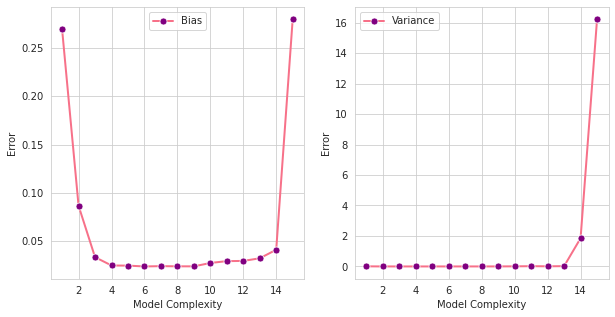

In [396]:
sns.set_palette("husl")

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.lineplot(data=df, x='Model Complexity', y='Bias', ax=axs[0], legend="brief", label="Bias", marker='o', linewidth=2, markerfacecolor='purple', markersize=7)
axs[0].set_ylabel("Error")

sns.lineplot(data=df, x='Model Complexity', y='Variance', ax=axs[1], legend="brief", label="Variance", marker='o', linewidth=2, markerfacecolor='purple', markersize=7)
axs[1].set_ylabel("Error")

plt.show()

In [397]:
df_err = pd.DataFrame({'Model Complexity': Degree, 'Irreducible Error': irr_err})
df_err

,Model Complexity,Irreducible Error
0,1,2.654127e-18
1,2,9.367507e-19
2,3,-2.996735e-18
3,4,-2.354887e-18
4,5,-3.877107e-18
5,6,6.453171e-18
6,7,8.326673e-19
7,8,5.204170e-19
8,9,3.469447e-19
9,10,3.885781e-18


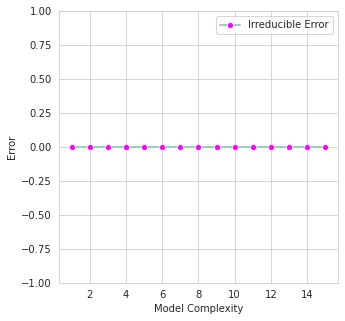

In [410]:
sns.set_palette("GnBu_d")

fig, axs = plt.subplots(figsize=(5, 5))
sns.lineplot(data=df_err, x='Model Complexity', y='Irreducible Error', legend="brief", label="Irreducible Error", marker='o', linewidth=2, markerfacecolor='magenta', markersize=6)
axs.set_ylabel("Error")
axs.set_ylim(-1, 1)

plt.show()

In [411]:
df_1 = pd.DataFrame({'Model Complexity': Degree[0:11], 'Bias_sq': bias_2[0:11], 'Variance': variance[0:11], 'MSE':mse[0:11], 'Train MSE':mse_train[0:11], 'Irreducible Error': irr_err[0:11]})
df_1

,Model Complexity,Bias_sq,Variance,MSE,Train MSE,Irreducible Error
0,1,0.114449,0.007734,0.122183,0.111180,2.654127e-18
1,2,0.012115,0.001018,0.013132,0.010329,9.367507e-19
2,3,0.004704,0.000512,0.005216,0.003490,-2.996735e-18
3,4,0.004257,0.000529,0.004786,0.003137,-2.354887e-18
4,5,0.004231,0.000584,0.004815,0.003071,-3.877107e-18
5,6,0.004219,0.000720,0.004939,0.002986,6.453171e-18
6,7,0.004214,0.000932,0.005146,0.002912,8.326673e-19
7,8,0.004204,0.001320,0.005524,0.002838,5.204170e-19
8,9,0.004274,0.002034,0.006309,0.002772,3.469447e-19
9,10,0.004443,0.007329,0.011772,0.002730,3.885781e-18


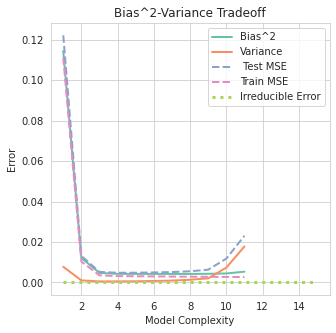

In [417]:
sns.set_palette("Set2", 10)

fig, axs = plt.subplots(figsize=(5, 5))
sns.lineplot(data=df_1, x='Model Complexity', y='Bias_sq', legend="brief", label="Bias^2", linewidth=2)
sns.lineplot(data=df_1, x='Model Complexity', y='Variance', legend="brief", label="Variance", linewidth=2)
sns.lineplot(data=df_1, x='Model Complexity', y='MSE', legend="brief", label=" Test MSE", linestyle="dashed", linewidth=2)
sns.lineplot(data=df_1, x='Model Complexity', y='Train MSE', legend="brief", label="Train MSE", linestyle="dashed", linewidth=2)
sns.lineplot(data=df_err, x='Model Complexity', y='Irreducible Error', legend="brief", label="Irreducible Error", linewidth=3, linestyle='dotted')

axs.set_ylabel("Error")
axs.set_title("Bias^2-Variance Tradeoff")

plt.show()